# <font color='blue'>Projeto</font>
# <font color='blue'>Web Data Analytics - Web Scraping</font>

## Instalando e Carregando os Pacotes

In [1]:
# Imports
import re
import bs4
import time
import json
import requests
from bs4 import BeautifulSoup as bs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Versões dos pacotes usados neste jupyter notebook
%reload_ext watermark
%watermark -a "Guilherme Goldoni --iversions

Author: Guilherme Goldoni --iversions



## Funções Para Extração de Dados Via Web Scraping

In [3]:
# Função para obter tudo que estiver nas tags td e div e com seletor CSS spaceit_pad
# Assim extraímos informações gerais da página
def getInfoGeral(soup):
    information = soup.select("td div .spaceit_pad")
    side_info_par = []
    for info in information:
        side_info_par.append(info.text.split())
    return side_info_par

In [6]:
# Função para obter o número de pessoas que adicionaram o anime aos favoritos
def getFavorite(information):
    for info in information:
        if info[0] == "Favorites:":
            data = info[1].split(",")
            return int("".join(data))
    return None

In [7]:
# Função para obter o número do episódio
def episodeNumberParser(information):
    for info in information:
        if (info[0] == "Episodes:"):
            if info[1] != "Unknown":
                return int(info[1])
            return None
    return None

In [8]:
# Função para obter o tipo de anime TV
def typeParser(information):
    for info in information:
        if (info[0] == "Type:"):
            return info[1]
    return None

In [9]:
# Função para obter o dia em que o anime estreou
def dayPremiered(information):
    for info in information:
        if (info[0] == "Premiered:"):
            premired_day = ""
            return " ".join(info[1:])
    return None

In [10]:
# Função para obter a fonte de onde do anime
def getSource(information):
    for info in information:
        if info[0] == "Source:":
            return " ".join(info[1:])
    return None

In [11]:
# Função para retornar uma lista de gêneros do anime
def getGenres(information):
    for info in information:
        if info[0] == "Genres:":
            genres = "".join(info[1:])
            return genres.split(",")
    return None

In [12]:
# Função que retorna uma lista de estúdios que estão patrocinando este anime
def getStudios(information):
    for info in information:
        if info[0] == "Studios:":
            return " ".join(info[1:])
    return None

In [13]:
# Função que retorna uma lista de empresas que realmente possuem a licença deste anime
def getLicense(information):
    for info in information:
        if info[0] == "Licensors:":
            if info[1] == "None":
                return None
            license = "".join(info[1:])
            return license.split(",")
    return None

In [14]:
# Função que obtém a classificação do filme 
def getRating(information):
    for info in information:
        if info[0] == "Rating:":
            return "".join(info[1:4])
    return None

#### Como encontrar os producers:

`finding_producers = soup2.find_all(["div","a"], class_=["spaceit_pad"])`

Primeiro encontre os dados usando find_all dos produtores mencionado acima.
Em seguida, enumere os dados encontrados.

`for index, j in enumerate(div_and_a):
    if finding_producers[index].text.split("\n")[1] == "Producers:":
        print(finding_producers[index])`

Se o primeiro índice == "Producers:"  então você obtém o índice onde encontrou os "Produtores".

E então usamos o índice conforme o código abaixo.

In [15]:
# Função para obter o nome de empresas que estão financiando o anime (Producers)
def producers_names(soup):
    div_and_a = soup.find_all(["div","a"], class_=["spaceit_pad"])
    for index, j in enumerate(div_and_a):
        if div_and_a[index].text.split("\n")[1] == "Producers:":
            res = re.sub(" *", "", div_and_a[index].text)
            new_res = res.split("\n")
            for i,j in enumerate(new_res):
                if j == "Producers:":
                    return new_res[i+1].split(",")
                    break
    return None

In [16]:
# Função para obter informações de ranking
def getRanking(soup):
    ranking = soup.select_one(".ranked strong").text
    data = ranking.split("#")[1]
    return int(data)

In [17]:
# Função para obter o score do Anime
def getScore(soup):
    data = float(soup.select_one(".score-label").text)
    return data

In [18]:
# Função para obter informação de popularidade
def getPopularity(soup):
    popularity = soup.select_one(".popularity strong").text
    data = popularity.split("#")[1]
    return int(data)

In [19]:
# Função para obter informação sobre os membros
def getMembers(soup):
    members = soup.select_one(".members strong").text
    data = members.split(",")
    return int("".join(data))

In [20]:
# Função para obter o número de pessoas que votaram no anime
def votersCount(soup):
    count = soup.select(".js-statistics-info span")
    data = []
    for i in count:
        data.append(i.text)
    if len(data) > 3:
        return int(data[2])
    return None

In [21]:
# Função para obter a voz do ator que faz a narração
def voiceActorsName(soup):
    actorNames = []
    names = soup.select(".js-anime-character-va-lang .spaceit_pad a")
    for name in names:
        data = "".join(name.text.split())
        actorNames.append(data)
    return actorNames

In [22]:
# Função para obter o idioma do ator que faz a narração
def voiceActorsLanguage(soup):
    languages = []
    langNames = soup.select(".js-anime-character-language")
    for language in langNames:
        lang = "".join(language.text.split())
        languages.append(lang)
    return languages

In [23]:
# Função que usa o voiceActorName e voiceActorsLanguage para criar um dataframe 
# que irá anexar todas as informações relacionadas às vozes dos atores.
# Usando essas informações, dividiremos os voiceActors com base em seus idiomas.
def voiceActorNameandLanguage(soup):
    names = voiceActorsName(soup)
    languages = voiceActorsLanguage(soup)
    namesAndLang = []
    for i in range(len(names)):
        namesAndLang.append([names[i], languages[i]])
    return namesAndLang

In [24]:
# Função que retorna a ocupação de cada funcionário
def staffOccupation(soup):
    data = []
    for i in soup.select('td .js-scrollfix-bottom-rel .spaceit_pad small'):
        data.append("".join(i.text.split()))
    return data

In [25]:
# Função que retorna o nome dos funcionários
def staffName(soup):
    data = []
    for i in soup.select('td .js-scrollfix-bottom-rel a'):
        data.append("".join(i.text.split()))
    uncleanData = []
    for index, info in enumerate(data):
        if info == "Addstaff":
            uncleanData.append(data[index+1:])
            break
    cleanData = []
    for i in uncleanData:
        for j in i:
            if len(j) > 1:
                cleanData.append(j)
    return cleanData

In [26]:
# Função que concatena nome e ocupação dos funcionários
def staffNameandOccupation(soup):
    name = staffName(soup)
    occupation = staffOccupation(soup)
    nameAndOccupation = []
    for i in range(len(name)):
        nameAndOccupation.append([name[i], occupation[i]])
    return nameAndOccupation

In [27]:
# Função que retorna o nome do Anime
def animeName(soup):
    name = soup.select_one(".title-name").text
    if len(name) > 1:
        return name
    return None

## Web Scraping

https://myanimelist.net/topanime.php?type=airing&limit=100

> O loop abaixo navega pelo web site e obtém os links dos animes, até o limite de 451. Os resultados de cada página (com 50 links) são salvos em arquivos txt.

In [28]:
%%time
for limit in range(0, 451, 50): 
    
    # Lista para os links
    links = []
    
    # URL
    url = f"https://myanimelist.net/topanime.php?limit={limit}"
    
    # Request
    rq = requests.get(url)
    print(rq.status_code)
    
    # Parse do html
    soup = bs(rq.text, "html.parser")
    
    # Seleção do que desejamos
    listsofA = soup.select(".hoverinfo_trigger a")
    
    # Loop para extrair o atributo href da tag a
    for a in listsofA:
        links.append(a.get("href"))
        
    # Abre o arquivo em disco
    file = open(f"dados/AnimeLinks/animeLinks{limit}.txt", "w")
    
    # Loop para salvar em disco
    for link in links:
        file.writelines(link+'\n')
        
    # Fecha o arquivo
    file.close()
    
    # Sleep
    time.sleep(10)

200
200
200
200
200
200
200
200
200
200
CPU times: user 1.5 s, sys: 65.6 ms, total: 1.57 s
Wall time: 1min 45s


> O loop abaixo faz a leitura dos arquivos txt extraídos no loop anterior e aplica as funções de web scraping para extrair os dados de cada link. Os resultados de cada página são salvos em arquivos txt.

In [29]:
%%time
for limit in range(0, 451, 50):
    
    # Lista
    animeInfo = []
    
    # Leitura dos arquivos txt com os links
    with open(f"dados/AnimeLinks/animeLinks{limit}.txt", "r") as file:
        links = file.readlines()
    
    print("Fazendo Web Scraping. Seja paciente e aguarde...")
    
    # Request para cada link
    for link in links:
        
        # Exemplo de url: https://myanimelist.net/anime/5114/Fullmetal_Alchemist__Brotherhood
        rq = requests.get(link)
        
        # Exemplo de url: https://myanimelist.net/anime/5114/Fullmetal_Alchemist__Brotherhood/characters
        rq2 = requests.get(link[:-2] + "/characters")
        
        # Soup com parse do html
        soup = bs(rq.text, "html.parser")
        soup2 = bs(rq2.text, "html.parser")
        
        # Obtém info geral da página
        information = getInfoGeral(soup)
        
        # Extrai os dados e salva na lista no formato de dicionário
        animeInfo.append(dict(
            name                      = animeName(soup),
            producers                 = producers_names(soup),
            ranking                   = getRanking(soup),
            votersCount               = votersCount(soup),
            score                     = getScore(soup),
            popularity                = getPopularity(soup),
            members                   = getMembers(soup),
            favorite                  = getFavorite(information),
            episodes                  = episodeNumberParser(information),
            animeType                 = typeParser(information),
            premiredDate              = dayPremiered(information),
            animeSource               = getSource(information),
            genres                    = getGenres(information),
            studios                   = getStudios(information),
            licenses                  = getLicense(information),
            rating                    = getRating(information),
            voiceActorNameandLanguage = voiceActorNameandLanguage(soup2),
            staffNameandOccupation    = staffNameandOccupation(soup2)))
        
        # Sleep
        time.sleep(10)

    # Grava o resultado em disco
    with open(f"dados/AnimeInfo/animeInfo{limit}.txt", 'w') as fout:
        json.dump(animeInfo, fout)
        
    # Sleep
    time.sleep(10)

Fazendo Web Scraping. Seja paciente e aguarde...
Fazendo Web Scraping. Seja paciente e aguarde...
Fazendo Web Scraping. Seja paciente e aguarde...
Fazendo Web Scraping. Seja paciente e aguarde...
Fazendo Web Scraping. Seja paciente e aguarde...
Fazendo Web Scraping. Seja paciente e aguarde...
Fazendo Web Scraping. Seja paciente e aguarde...
Fazendo Web Scraping. Seja paciente e aguarde...
Fazendo Web Scraping. Seja paciente e aguarde...
Fazendo Web Scraping. Seja paciente e aguarde...
CPU times: user 3min 18s, sys: 3.94 s, total: 3min 22s
Wall time: 1h 37min 48s


> O loop abaixo faz a leitura dos arquivos txt com os links dos animes e extrai os nomes dos animes, salvando o resultado em disco.

In [30]:
%%time
for limit in range(0, 451, 50):
    
    # Lista
    animeInfoName = []
    
    # Abre os arquivos de links para leitura
    with open(f"dados/AnimeLinks/animeLinks{limit}.txt", "r") as file:
        links = file.readlines()
    
    print("Extraindo os nomes dos animes. Seja paciente e aguarde...")
    
    # Loop pelos links para extrair o nome dos animes
    for link in links:
        rq = requests.get(link)
        soup = bs(rq.text, "html.parser")
        animeInfoName.append(dict(name = animeName(soup)))
        time.sleep(5)

    # Salva o resultado em disco no formato json
    with open(f"dados/AnimeInfoNames/animeInfoNames{limit}.txt", 'w') as fout:
        json.dump(animeInfoName, fout)

Extraindo os nomes dos animes. Seja paciente e aguarde...
Extraindo os nomes dos animes. Seja paciente e aguarde...
Extraindo os nomes dos animes. Seja paciente e aguarde...
Extraindo os nomes dos animes. Seja paciente e aguarde...
Extraindo os nomes dos animes. Seja paciente e aguarde...
Extraindo os nomes dos animes. Seja paciente e aguarde...
Extraindo os nomes dos animes. Seja paciente e aguarde...
Extraindo os nomes dos animes. Seja paciente e aguarde...
Extraindo os nomes dos animes. Seja paciente e aguarde...
Extraindo os nomes dos animes. Seja paciente e aguarde...
CPU times: user 50.3 s, sys: 1.36 s, total: 51.7 s
Wall time: 47min 28s


In [31]:
print("\nWeb Scraping Concluído com Sucesso. Obrigado Por Aguardar.\n")


Web Scraping Concluído com Sucesso. Obrigado Por Aguardar.



# Combinação de Dados

In [4]:
# Cria a lista
animeData = []

In [5]:
# Loop para carregar os arquivos do disco na lista
for i in range(0, 451, 50):
    with open(f"dados/AnimeInfo/animeInfo{i}.txt") as file:
        animeInfo = json.load(file)
        for j in range(50):
            animeData.append(animeInfo[j])

In [7]:
# Converte a lista para dataframe
df1 = pd.DataFrame(animeData)

In [8]:
# Visualiza amostra
df1.head()

,name,producers,ranking,votersCount,score,popularity,members,favorite,episodes,animeType,premiredDate,animeSource,genres,studios,licenses,rating,voiceActorNameandLanguage,staffNameandOccupation
0,Fullmetal Alchemist: Brotherhood,"[Aniplex, SquareEnix, MainichiBroadcastingSyst...",1,1650275,9.15,3,2713695,191501,64.0,TV,Spring 2009,Manga,"[ActionAction, AdventureAdventure, ComedyComed...",Bones,"[Funimation, AniplexofAmerica]",R-17+,"[[Kugimiya,Rie, Japanese], [Ponticelli,Benedet...","[[Cook,Justin, Producer], [Yonai,Noritomo, Pro..."
1,Gintama°,"[TVTokyo, Aniplex, Dentsu]",2,173906,9.09,337,493336,13063,51.0,TV,Spring 2015,Manga,"[ActionAction, ComedyComedy, Sci-FiSci-Fi]",Bandai Namco Pictures,"[Funimation, Crunchyroll]",PG-13-Teens,"[[Kugimiya,Rie, Japanese], [Ishii,Kouji, Japan...","[[Fujita,Youichi, Director,Storyboard,Planning..."
2,Shingeki no Kyojin Season 3 Part 2,"[ProductionI.G, Dentsu, MainichiBroadcastingSy...",3,1127900,9.09,33,1635976,46238,10.0,TV,Spring 2019,Manga,"[ActionAction, DramaDrama, FantasyFantasy, Mys...",Wit Studio,[Funimation],R-17+,"[[Ishikawa,Yui, Japanese], [Perino,Elena, Ital...","[[Morishita,Katsuji, Producer,Planning], [Naka..."
3,Steins;Gate,"[FrontierWorks, MediaFactory, Movic, AT-X, Kad...",4,1128557,9.09,12,2117018,162324,24.0,TV,Spring 2011,Visual novel,"[DramaDrama, Sci-FiSci-Fi, SuspenseSuspense]",White Fox,[Funimation],PG-13-Teens,"[[Seki,Tomokazu, Japanese], [Rinehart,Tyson, E...","[[Iwasa,Gaku, Producer], [Yasuda,Takeshi, Prod..."
4,Fruits Basket: The Final,"[TVTokyo, TVOsaka, NihonAdSystems, Hakusensha,...",5,124091,9.06,619,288314,13330,13.0,TV,Spring 2021,Manga,"[ComedyComedy, DramaDrama, RomanceRomance, Sli...",TMS Entertainment,[Funimation],PG-13-Teens,"[[Iwami,Manaka, Japanese], [Ruis,Carolina, Por...","[[Ibata,Yoshihide, Director], [Aketagawa,Jin, ..."


In [9]:
# Info
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   name                       500 non-null    object 
 1   producers                  500 non-null    object 
 2   ranking                    500 non-null    int64  
 3   votersCount                500 non-null    int64  
 4   score                      500 non-null    float64
 5   popularity                 500 non-null    int64  
 6   members                    500 non-null    int64  
 7   favorite                   500 non-null    int64  
 8   episodes                   495 non-null    float64
 9   animeType                  500 non-null    object 
 10  premiredDate               295 non-null    object 
 11  animeSource                500 non-null    object 
 12  genres                     455 non-null    object 
 13  studios                    500 non-null    object 

In [10]:
# Cria a lista
animeNames = []

In [11]:
# Loop para carregar os arquivos do disco na lista
for i in range(0, 451, 50):
    with open(f"dados/AnimeInfoNames/animeInfoNames{i}.txt") as file:
        animeInfoNames = json.load(file)
        for j in range(50):
            animeNames.append(animeInfoNames[j])

In [12]:
df2 = pd.DataFrame(animeNames)

In [13]:
# Cria uma cópia de df1
df3 = df1.copy()

In [14]:
# Combina df3 e df2
df3["name"] = df2["name"]

In [15]:
# Salva em disco
df3.to_csv("dados/Processamento/animeInfoCombination.csv", index = False)

# Limpeza e Formatação de Dados

In [16]:
# Carrega os arquivos
df = pd.read_csv("dados/Processamento/animeInfoCombination.csv")

In [17]:
# Aumenta o número de colunas que podemos visualizar aqui no navegador
pd.set_option("display.max_columns", 97)

In [18]:
# Visualiza amostra de dados
df.head()

,name,producers,ranking,votersCount,score,popularity,members,favorite,episodes,animeType,premiredDate,animeSource,genres,studios,licenses,rating,voiceActorNameandLanguage,staffNameandOccupation
0,Fullmetal Alchemist: Brotherhood,"['Aniplex', 'SquareEnix', 'MainichiBroadcastin...",1,1650275,9.15,3,2713695,191501,64.0,TV,Spring 2009,Manga,"['ActionAction', 'AdventureAdventure', 'Comedy...",Bones,"['Funimation', 'AniplexofAmerica']",R-17+,"[['Kugimiya,Rie', 'Japanese'], ['Ponticelli,Be...","[['Cook,Justin', 'Producer'], ['Yonai,Noritomo..."
1,Gintama°,"['TVTokyo', 'Aniplex', 'Dentsu']",2,173906,9.09,337,493336,13063,51.0,TV,Spring 2015,Manga,"['ActionAction', 'ComedyComedy', 'Sci-FiSci-Fi']",Bandai Namco Pictures,"['Funimation', 'Crunchyroll']",PG-13-Teens,"[['Kugimiya,Rie', 'Japanese'], ['Ishii,Kouji',...","[['Fujita,Youichi', 'Director,Storyboard,Plann..."
2,Shingeki no Kyojin Season 3 Part 2,"['ProductionI.G', 'Dentsu', 'MainichiBroadcast...",3,1127900,9.09,33,1635976,46238,10.0,TV,Spring 2019,Manga,"['ActionAction', 'DramaDrama', 'FantasyFantasy...",Wit Studio,['Funimation'],R-17+,"[['Ishikawa,Yui', 'Japanese'], ['Perino,Elena'...","[['Morishita,Katsuji', 'Producer,Planning'], [..."
3,Steins;Gate,"['FrontierWorks', 'MediaFactory', 'Movic', 'AT...",4,1128557,9.09,12,2117018,162324,24.0,TV,Spring 2011,Visual novel,"['DramaDrama', 'Sci-FiSci-Fi', 'SuspenseSuspen...",White Fox,['Funimation'],PG-13-Teens,"[['Seki,Tomokazu', 'Japanese'], ['Rinehart,Tys...","[['Iwasa,Gaku', 'Producer'], ['Yasuda,Takeshi'..."
4,Fruits Basket: The Final,"['TVTokyo', 'TVOsaka', 'NihonAdSystems', 'Haku...",5,124091,9.06,619,288314,13330,13.0,TV,Spring 2021,Manga,"['ComedyComedy', 'DramaDrama', 'RomanceRomance...",TMS Entertainment,['Funimation'],PG-13-Teens,"[['Iwami,Manaka', 'Japanese'], ['Ruis,Carolina...","[['Ibata,Yoshihide', 'Director'], ['Aketagawa,..."


In [19]:
def remove_quote(word):
    return word.replace("'","")

In [20]:
def remove_openBracket(word):
    return word.replace("[","")

In [21]:
def remove_closeBracket(word):
    return word.replace("]","")

In [22]:
def remove_space(word):
    return word.replace(" ","")

In [23]:
def remove_commaWithSemicolon(word):
    return word.replace(",",";")

In [24]:
# Aplica as funções para formatar os nomes dos producers
df["producers"] = remove_quote(df["producers"].str)
df["producers"] = remove_openBracket(df["producers"].str)
df["producers"] = remove_closeBracket(df["producers"].str)
df["producers"] = remove_commaWithSemicolon(df["producers"].str)
df["producers"] = remove_space(df["producers"].str)

In [25]:
# Aplica as funções para formatar os nomes dos genres
df["genres"] = remove_quote(df["genres"].str)
df["genres"] = remove_openBracket(df["genres"].str)
df["genres"] = remove_closeBracket(df["genres"].str)
df["genres"] = remove_commaWithSemicolon(df["genres"].str)
df["genres"] = remove_space(df["genres"].str)

In [26]:
# Aplica as funções para formatar os nomes das licenses
df["licenses"] = remove_quote(df["licenses"].str)
df["licenses"] = remove_openBracket(df["licenses"].str)
df["licenses"] = remove_closeBracket(df["licenses"].str)
df["licenses"] = remove_commaWithSemicolon(df["licenses"].str)
df["licenses"] = remove_space(df["licenses"].str)

In [27]:
# Novo dataframe a partir do split da lista
newdf = pd.DataFrame(df["genres"].str.split(';'))

In [28]:
# Obtendo a lista de gêneros únicos para que possamos substituí-los todos mais tarde
unique_values = []
for genres in newdf["genres"]:
    if type(genres) != float:
        for genre in genres:
            if genre not in unique_values:
                unique_values.append(genre)

In [29]:
# Passando por todos os dados e, em seguida, mudando seus gêneros
for index, genres in enumerate(newdf["genres"]):
    new_genre = ""
    if type(genres) != float:
        for genre in genres:
            if genre == "ActionAction":
                new_genre += "Action"
            elif genre == "AdventureAdventure":
                new_genre += "Adventure"
            elif genre == "ComedyComedy":
                new_genre += "Comedy"
            elif genre == "DramaDrama":
                new_genre += "Drama"
            elif genre == "FantasyFantasy":
                new_genre += "Fantasy"
            elif genre == "Sci-FiSci-Fi":
                new_genre += "Sci-fi"
            elif genre == "MysteryMystery":
                new_genre += "Mystery"
            elif genre == "SuspenseSuspense":
                new_genre += "Suspense"
            elif genre == "RomanceRomance":
                new_genre += "Romance"
            elif genre == "SliceofLifeSliceofLife":
                new_genre += "Sliceoflife"
            elif genre == "SupernaturalSupernatural":
                new_genre += "Supernatural"
            elif genre == "SportsSports":
                new_genre += "Sports"
            elif genre == "HorrorHorror":
                new_genre += "Horror"
            elif genre == "EcchiEcchi":
                new_genre += "Ecchi"
            elif genre == "AvantGardeAvantGarde":
                new_genre += "Avant_garde"
            elif genre == "BoysLoveBoysLove":
                new_genre += "Boys_love"
            elif genre == "GourmetGourmet":
                new_genre += "Gourmet"
            elif genre == "GirlsLoveGirlsLove":
                new_genre += "Girls_love"
            elif genre == "WorkLifeWorkLife":
                new_genre += "Work_life"
    newdf["genres"][index] = new_genre

In [30]:
# Atribuindo as informações do gênero alterado ao novo dataframe
for index, genres in enumerate(newdf["genres"]):
    if type(genres) != float:
        newdf["genres"][index] = ";".join(re.findall('[A-Z][^A-Z]*', newdf["genres"][index]))

In [31]:
# Substituindo as informações de gênero pelos dados limpos
df["genres"] = newdf["genres"]

In [32]:
# Criamos um dataframe apenas para voiceActorNameandLanguage porque queremos fazer as mudanças 
# e depois acrescentá-las ao dataframe original
newdf = pd.DataFrame(df["voiceActorNameandLanguage"])

In [33]:
# Removendo [[e]] do final de cada string em voiceActorNameandLanguage 
for index, data in enumerate(newdf["voiceActorNameandLanguage"]):
    if type(data) != float:
        newdf["voiceActorNameandLanguage"][index] = newdf["voiceActorNameandLanguage"][index].replace("[[","[")
        newdf["voiceActorNameandLanguage"][index] = newdf["voiceActorNameandLanguage"][index].replace("]]","]")

In [34]:
# Remove aspas simples e [ de voiceActorNameandLanguage 
newdf["voiceActorNameandLanguage"] = remove_quote(newdf["voiceActorNameandLanguage"].str)
newdf["voiceActorNameandLanguage"] = remove_openBracket(newdf["voiceActorNameandLanguage"].str)

In [35]:
# Remove "], " e então [ e então faz o split dos dados com base em ; 
# Por fim, criar a lista de atores e seus idiomas
for index, data in enumerate(newdf["voiceActorNameandLanguage"]):
    if type(data) != float:
        newdf["voiceActorNameandLanguage"][index] = re.sub(r"], ", ";", newdf["voiceActorNameandLanguage"][index])
        newdf["voiceActorNameandLanguage"][index] = remove_closeBracket(newdf["voiceActorNameandLanguage"][index])
        newdf["voiceActorNameandLanguage"][index] = newdf["voiceActorNameandLanguage"][index].split(";")
        for i, newData in enumerate(newdf["voiceActorNameandLanguage"][index]):
            newdf["voiceActorNameandLanguage"][index][i] = newdf["voiceActorNameandLanguage"][index][i].split(", ")

In [36]:
# Obtém os idiomas únicos usados em diferentes animes
# Encontramos idiomas únicos para que possam ser nossas colunas
unique_languages = []
for index, info in enumerate(newdf["voiceActorNameandLanguage"]):
    for data in newdf["voiceActorNameandLanguage"][index]:
        if len(data) > 1:
            if data[1] not in unique_languages:
                unique_languages.append(data[1])

In [37]:
# Idiomas únicos
unique_languages

['Japanese',
 'Italian',
 'Portuguese(BR)',
 'German',
 'Hungarian',
 'English',
 'Korean',
 'Spanish',
 'French',
 'Mandarin',
 'Hebrew']

In [38]:
# Criando um dicionário de lista para que possamos transformá-lo em um dataframe mais tarde
new_dic = dict()
for data in unique_languages:
    new_dic[data] = []

In [39]:
# Criando um dataframe que irá dividir as vozes dos atores com base em seu idioma
for index, info in enumerate(newdf["voiceActorNameandLanguage"]):
    if len(info) > 1:
        Japanese = []
        Italian = []
        PortugueseBR = []
        German = []
        Hungarian = []
        English = []
        Korean = []
        Spanish = []
        French = []
        Mandarin = []
        Hebrew = []
        for data in newdf["voiceActorNameandLanguage"][index]:
            if data[1] == "Japanese":
                Japanese.append(data[0])
            elif data[1] == "Italian":
                Italian.append(data[0])
            elif data[1] == "Portuguese(BR)":
                PortugueseBR.append(data[0])
            elif data[1] == "German":
                German.append(data[0])
            elif data[1] == "Hungarian":
                Hungarian.append(data[0])
            elif data[1] == "English":
                English.append(data[0])
            elif data[1] == "Korean":
                Korean.append(data[0])
            elif data[1] == "Spanish":
                Spanish.append(data[0])
            elif data[1] == "French":
                French.append(data[0])
            elif data[1] == "Mandarin":
                Mandarin.append(data[0])
            elif data[1] == "Hebrew":
                Hebrew.append(data[0])
        new_dic["Japanese"].append(";".join(Japanese))
        new_dic["Italian"].append(";".join(Italian))
        new_dic["Portuguese(BR)"].append(";".join(PortugueseBR))
        new_dic["German"].append(";".join(German))
        new_dic["Hungarian"].append(";".join(Hungarian))
        new_dic["English"].append(";".join(English))
        new_dic["Korean"].append(";".join(Korean))
        new_dic["Spanish"].append(";".join(Spanish))
        new_dic["French"].append(";".join(French))
        new_dic["Mandarin"].append(";".join(Mandarin))
        new_dic["Hebrew"].append(";".join(Hebrew))
    else:
        new_dic["Japanese"].append(np.nan)
        new_dic["Italian"].append(np.nan)
        new_dic["Portuguese(BR)"].append(np.nan)
        new_dic["German"].append(np.nan)
        new_dic["Hungarian"].append(np.nan)
        new_dic["English"].append(np.nan)
        new_dic["Korean"].append(np.nan)
        new_dic["Spanish"].append(np.nan)
        new_dic["French"].append(np.nan)
        new_dic["Mandarin"].append(np.nan)
        new_dic["Hebrew"].append(np.nan)

In [40]:
# Converte o dicionário em dataframe
newestdf = pd.DataFrame(new_dic)

In [41]:
# Merge
df = df.merge(newestdf, left_index = True, right_index = True, sort = False)

In [42]:
df.head()

,name,producers,ranking,votersCount,score,popularity,members,favorite,episodes,animeType,premiredDate,animeSource,genres,studios,licenses,rating,voiceActorNameandLanguage,staffNameandOccupation,Japanese,Italian,Portuguese(BR),German,Hungarian,English,Korean,Spanish,French,Mandarin,Hebrew
0,Fullmetal Alchemist: Brotherhood,Aniplex;SquareEnix;MainichiBroadcastingSystem;...,1,1650275,9.15,3,2713695,191501,64.0,TV,Spring 2009,Manga,Action;Adventure;Comedy;Drama;Fantasy,Bones,Funimation;AniplexofAmerica,R-17+,"[['Kugimiya,Rie', 'Japanese'], ['Ponticelli,Be...","[['Cook,Justin', 'Producer'], ['Yonai,Noritomo...","Kugimiya,Rie;Park,Romi;Utsumi,Kenji;Utsumi,Ken...","Ponticelli,Benedetta;Novara,Renato;Scianca,Pat...","Andreatto,Rodrigo;Campos,Marcelo;Zink,Mariana;...","Gerick,Wanja;Turba,David;Häcke,Maximiliane;Mai...","Baráth,István;Szabó,Máté;Faragó,András;Varga,R...","Whitehead,Maxey;Truncale,Lily;Mignogna,Vic;Hof...","Yun,MiNa;O,InSeong;Yang,JeongHwa;Lee,JiYeong;H...","Torres,Jhonny;Vieira,JoseManuel;Perez,LuisMigu...","Pic,Audrey;Boudonnat,Lucille;Pestel,Arthur;Cre...",,
1,Gintama°,TVTokyo;Aniplex;Dentsu,2,173906,9.09,337,493336,13063,51.0,TV,Spring 2015,Manga,Action;Comedy;Sci-fi,Bandai Namco Pictures,Funimation;Crunchyroll,PG-13-Teens,"[['Kugimiya,Rie', 'Japanese'], ['Ishii,Kouji',...","[['Fujita,Youichi', 'Director,Storyboard,Plann...","Kugimiya,Rie;Ishii,Kouji;Sugita,Tomokazu;Tomat...",,,,,"Loewen,Jocelyne;Daingerfield,Michael;Pitre,Sab...",,,,,
2,Shingeki no Kyojin Season 3 Part 2,ProductionI.G;Dentsu;MainichiBroadcastingSyste...,3,1127900,9.09,33,1635976,46238,10.0,TV,Spring 2019,Manga,Action;Drama;Fantasy;Mystery,Wit Studio,Funimation,R-17+,"[['Ishikawa,Yui', 'Japanese'], ['Perino,Elena'...","[['Morishita,Katsuji', 'Producer,Planning'], [...","Ishikawa,Yui;Inoue,Marina;Kamiya,Hiroshi;Kaji,...","Perino,Elena;Bolognesi,Gaia;Raffaeli,Daniele;C...","Stefane,Mayara;Volpato,Pedro;Sangregório,Bruno...",,,"Nishimura,Trina;Grelle,Josh;Mercer,Matthew;Pap...",,,"Bienaimé,Nathalie;Niverd,Victor;Méyère,Bruno;G...",,
3,Steins;Gate,FrontierWorks;MediaFactory;Movic;AT-X;Kadokawa...,4,1128557,9.09,12,2117018,162324,24.0,TV,Spring 2011,Visual novel,Drama;Sci-fi;Suspense,White Fox,Funimation,PG-13-Teens,"[['Seki,Tomokazu', 'Japanese'], ['Rinehart,Tys...","[['Iwasa,Gaku', 'Producer'], ['Yasuda,Takeshi'...","Seki,Tomokazu;Imai,Asami;Miyano,Mamoru;Hanazaw...","Vivio,Paolo;Paolelli,Rachele;Chevalier,Davide;...","Casemiro,Bruno;Cunha,Maitê;Rinaldi,André;Lua,B...","Wirthgen,Jesco;Bäcker,Manuela;Gavrilis,Marios;...",,"Rinehart,Tyson;Nishimura,Trina;Tatum,JohnMicha...","Wu,JeongSin;Hong,SiHo;Yeo,MinJeong;Kim,SeoYeon...","Naro,Jordi","Pasquier,Laurent;Cornibert,Sarah;Wilhelm,Marc;...",,
4,Fruits Basket: The Final,TVTokyo;TVOsaka;NihonAdSystems;Hakusensha;Avex...,5,124091,9.06,619,288314,13330,13.0,TV,Spring 2021,Manga,Comedy;Drama;Romance;Sliceoflife;Supernatural,TMS Entertainment,Funimation,PG-13-Teens,"[['Iwami,Manaka', 'Japanese'], ['Ruis,Carolina...","[['Ibata,Yoshihide', 'Director'], ['Aketagawa,...","Iwami,Manaka;Uchida,Yuuma;Shimazaki,Nobunaga;S...",,"Ruis,Carolina;Campos,Fábio;Volpato,Pedro;Caval...",,,"Yeung,Suzie;Sabat,Christopher;Leigh,Cherami",,,,,


In [43]:
staffNnO = pd.DataFrame(df["staffNameandOccupation"])

In [44]:
# Limpeza dos dados
for index, data in enumerate(staffNnO["staffNameandOccupation"]):
    staffNnO["staffNameandOccupation"][index] = staffNnO["staffNameandOccupation"][index].replace("[[", "[")
    staffNnO["staffNameandOccupation"][index] = staffNnO["staffNameandOccupation"][index].replace("]]", "]")
    staffNnO["staffNameandOccupation"][index] = staffNnO["staffNameandOccupation"][index].replace("[\'", "")
    staffNnO["staffNameandOccupation"][index] = staffNnO["staffNameandOccupation"][index].replace("\'", "")
    staffNnO["staffNameandOccupation"][index] = staffNnO["staffNameandOccupation"][index].replace("], ", ";")
    staffNnO["staffNameandOccupation"][index] = staffNnO["staffNameandOccupation"][index].replace("]", "")

In [45]:
# Faz o split com base no índice
for index, data in enumerate(staffNnO["staffNameandOccupation"]):
    staffNnO["staffNameandOccupation"][index] = staffNnO["staffNameandOccupation"][index].split(";")
    for i, info in enumerate(staffNnO["staffNameandOccupation"][index]):
        staffNnO["staffNameandOccupation"][index][i] = staffNnO["staffNameandOccupation"][index][i].split(", ")

In [46]:
# Gera o dataframe
for i in range(len(staffNnO["staffNameandOccupation"])):
    for j, job in enumerate(staffNnO["staffNameandOccupation"][i]):
        if len(staffNnO["staffNameandOccupation"][i][j]) > 1:
            staffNnO["staffNameandOccupation"][i][j][-1] = staffNnO["staffNameandOccupation"][i][j][1].split(",")

In [47]:
# Fazer com que a profissão única seja usada em diferentes animes
unique_profes = []
for i in range(len(staffNnO["staffNameandOccupation"])):
    for j, job in enumerate(staffNnO["staffNameandOccupation"][i]):
        if len(job) > 1:
            for k, profes in enumerate(job[1]):
                if profes not in unique_profes:
                    unique_profes.append(profes)

In [48]:
# Criando um dicionário de lista para que possamos transformá-lo em um dataframe mais tarde
profes_dic = dict()
for data in unique_profes:
    profes_dic[data] = []

In [49]:
# Gerando o dataframe
for i in range(len(staffNnO["staffNameandOccupation"])):
    Producer = []
    Director = []
    EpisodeDirector = []
    Storyboard = []
    SoundDirector = []
    KeyAnimation = []
    KeyAnimation2nd = []
    CharacterDesign = []
    Script = []
    SeriesComposition = []
    ThemeSongLyrics = []
    ThemeSongPerformance = []
    ThemeSongArrangement = []
    ThemeSongComposition = []
    AnimationDirector = []
    OriginalCreator = []
    ADRDirector = []
    ExecutiveProducer = []
    ChiefAnimationDirector = []
    DirectorofPhotography = []
    In_BetweenAnimation = []
    BackgroundArt = []
    Planning = []
    ColorDesign = []
    AssistantAnimationDirector = []
    Editing = []
    ArtDirector = []
    Music = []
    ProductionCoordination = []
    DigitalPaint = []
    ColorSetting = []
    AssistantDirector = []
    SoundEffects = []
    InsertedSongPerformance = []
    OriginalCharacterDesign = []
    Setting = []
    Screenplay = []
    AssociateProducer = []
    SpecialEffects = []
    AnimationCheck = []
    ProductionAssistant = []
    SoundSupervisor = []
    PrincipleDrawing = []
    AssistantProducer = []
    ProductionManager = []
    SoundManager = []
    Co_Director = []
    SeriesProductionDirector = []
    MechanicalDesign = []
    PlanningProducer = []
    Layout = []
    ChiefProducer = []
    Recording = []
    DialogueEditing = []
    RecordingEngineer = []
    Creator = []
    RecordingAssistant = []
    Publicity = []
    Co_Producer = []
    CastingDirector = []
    Re_RecordingMixing = []
    AssistantProductionCoordinat = []
    SettingManager = []
    
    # Encontrando profissões únicas para que sejam nossas colunas.
    for j, job in enumerate(staffNnO["staffNameandOccupation"][i]):
        if len(job) > 1:
            for k, profes in enumerate(job[1]):
                if profes == "Producer":
                    Producer.append(job[0])
                elif profes == 'Director':
                    Director.append(job[0])
                elif profes == 'EpisodeDirector':
                    EpisodeDirector.append(job[0])
                elif profes == 'Storyboard':
                    Storyboard.append(job[0])
                elif profes == 'SoundDirector':
                    SoundDirector.append(job[0])
                elif profes == 'KeyAnimation':
                    KeyAnimation.append(job[0])
                elif profes == '2ndKeyAnimation':
                    KeyAnimation2nd.append(job[0])
                elif profes == 'CharacterDesign':
                    CharacterDesign.append(job[0])
                elif profes == 'Script':
                    Script.append(job[0])
                elif profes == 'SeriesComposition':
                    SeriesComposition.append(job[0])
                elif profes == 'ThemeSongLyrics':
                    ThemeSongLyrics.append(job[0])
                elif profes == 'ThemeSongPerformance':
                    ThemeSongPerformance.append(job[0])
                elif profes == 'ThemeSongArrangement':
                    ThemeSongArrangement.append(job[0])
                elif profes == 'ThemeSongComposition':
                    ThemeSongComposition.append(job[0])
                elif profes == 'AnimationDirector':
                    AnimationDirector.append(job[0])
                elif profes == 'OriginalCreator':
                    OriginalCreator.append(job[0])
                elif profes == 'ADRDirector':
                    ADRDirector.append(job[0])
                elif profes == 'ExecutiveProducer':
                    ExecutiveProducer.append(job[0])
                elif profes == 'ChiefAnimationDirector':
                    ChiefAnimationDirector.append(job[0])
                elif profes == 'DirectorofPhotography':
                    DirectorofPhotography.append(job[0])
                elif profes == 'In-BetweenAnimation':
                    In_BetweenAnimation.append(job[0])
                elif profes == 'BackgroundArt':
                    BackgroundArt.append(job[0])
                elif profes == 'Planning':
                    Planning.append(job[0])
                elif profes == 'ColorDesign':
                    ColorDesign.append(job[0])
                elif profes == 'AssistantAnimationDirector':
                    AssistantAnimationDirector.append(job[0])
                elif profes == 'Editing':
                    Editing.append(job[0])
                elif profes == 'ArtDirector':
                    ArtDirector.append(job[0])
                elif profes == 'Music':
                    Music.append(job[0])
                elif profes == 'ProductionCoordination':
                    ProductionCoordination.append(job[0])
                elif profes == 'DigitalPaint':
                    DigitalPaint.append(job[0])
                elif profes == 'ColorSetting':
                    ColorSetting.append(job[0])
                elif profes == 'AssistantDirector':
                    AssistantDirector.append(job[0])
                elif profes == 'SoundEffects':
                    SoundEffects.append(job[0])
                elif profes == 'InsertedSongPerformance':
                    InsertedSongPerformance.append(job[0])
                elif profes == 'OriginalCharacterDesign':
                    OriginalCharacterDesign.append(job[0])
                elif profes == 'Setting':
                    Setting.append(job[0])
                elif profes == 'Screenplay':
                    Screenplay.append(job[0])
                elif profes == 'AssociateProducer':
                    AssociateProducer.append(job[0])
                elif profes == 'SpecialEffects':
                    SpecialEffects.append(job[0])
                elif profes == 'AnimationCheck':
                    AnimationCheck.append(job[0])
                elif profes == 'ProductionAssistant':
                    ProductionAssistant.append(job[0])
                elif profes == 'SoundSupervisor':
                    SoundSupervisor.append(job[0])
                elif profes == 'PrincipleDrawing':
                    PrincipleDrawing.append(job[0])
                elif profes == 'AssistantProducer':
                    AssistantProducer.append(job[0])
                elif profes == 'ProductionManager':
                    ProductionManager.append(job[0])
                elif profes == 'SoundManager':
                    SoundManager.append(job[0])
                elif profes == 'Co-Director':
                    Co_Director.append(job[0])
                elif profes == 'SeriesProductionDirector':
                    SeriesProductionDirector.append(job[0])
                elif profes == 'MechanicalDesign':
                    MechanicalDesign.append(job[0])
                elif profes == 'PlanningProducer':
                    PlanningProducer.append(job[0])
                elif profes == 'Layout':
                    Layout.append(job[0])
                elif profes == 'ChiefProducer':
                    ChiefProducer.append(job[0])
                elif profes == 'Recording':
                    Recording.append(job[0])
                elif profes == 'DialogueEditing':
                    DialogueEditing.append(job[0])
                elif profes == 'RecordingEngineer':
                    RecordingEngineer.append(job[0])
                elif profes == 'Creator':
                    Creator.append(job[0])
                elif profes == 'RecordingAssistant':
                    RecordingAssistant.append(job[0])
                elif profes == 'Publicity':
                    Publicity.append(job[0])
                elif profes == 'Co-Producer':
                    Co_Producer.append(job[0])
                elif profes == 'CastingDirector':
                    CastingDirector.append(job[0])
                elif profes == 'Re-RecordingMixing':
                    Re_RecordingMixing.append(job[0])
                elif profes == 'AssistantProductionCoordinat':
                    AssistantProductionCoordinat.append(job[0])
                elif profes == 'SettingManager':
                    SettingManager.append(job[0])
    
    # Adiciona ao dicionário
    profes_dic["Producer"].append(";".join(Producer))
    profes_dic["Director"].append(";".join(Director))
    profes_dic["EpisodeDirector"].append(";".join(EpisodeDirector))
    profes_dic["Storyboard"].append(";".join(Storyboard))
    profes_dic["SoundDirector"].append(";".join(SoundDirector))
    profes_dic["KeyAnimation"].append(";".join(KeyAnimation))
    profes_dic["2ndKeyAnimation"].append(";".join(KeyAnimation2nd))
    profes_dic["CharacterDesign"].append(";".join(CharacterDesign))
    profes_dic["Script"].append(";".join(Script))
    profes_dic["SeriesComposition"].append(";".join(SeriesComposition))
    profes_dic["ThemeSongLyrics"].append(";".join(ThemeSongLyrics))
    profes_dic["ThemeSongPerformance"].append(";".join(ThemeSongPerformance))
    profes_dic["ThemeSongArrangement"].append(";".join(ThemeSongArrangement))
    profes_dic["ThemeSongComposition"].append(";".join(ThemeSongComposition))
    profes_dic["AnimationDirector"].append(";".join(AnimationDirector))
    profes_dic["OriginalCreator"].append(";".join(OriginalCreator))
    profes_dic["ADRDirector"].append(";".join(ADRDirector))
    profes_dic["ExecutiveProducer"].append(";".join(ExecutiveProducer))
    profes_dic["ChiefAnimationDirector"].append(";".join(ChiefAnimationDirector))
    profes_dic["DirectorofPhotography"].append(";".join(DirectorofPhotography))
    profes_dic["In-BetweenAnimation"].append(";".join(In_BetweenAnimation))
    profes_dic["BackgroundArt"].append(";".join(BackgroundArt))
    profes_dic["Planning"].append(";".join(Planning))
    profes_dic["ColorDesign"].append(";".join(ColorDesign))
    profes_dic["AssistantAnimationDirector"].append(";".join(AssistantAnimationDirector))
    profes_dic["Editing"].append(";".join(Editing))
    profes_dic["ArtDirector"].append(";".join(ArtDirector))
    profes_dic["Music"].append(";".join(Music))
    profes_dic["ProductionCoordination"].append(";".join(ProductionCoordination))
    profes_dic["DigitalPaint"].append(";".join(DigitalPaint))
    profes_dic["ColorSetting"].append(";".join(ColorSetting))
    profes_dic["AssistantDirector"].append(";".join(AssistantDirector))
    profes_dic["SoundEffects"].append(";".join(SoundEffects))
    profes_dic["InsertedSongPerformance"].append(";".join(InsertedSongPerformance))
    profes_dic["OriginalCharacterDesign"].append(";".join(OriginalCharacterDesign))
    profes_dic["Setting"].append(";".join(Setting))
    profes_dic["Screenplay"].append(";".join(Screenplay))
    profes_dic["AssociateProducer"].append(";".join(AssociateProducer))
    profes_dic["SpecialEffects"].append(";".join(SpecialEffects))
    profes_dic["AnimationCheck"].append(";".join(AnimationCheck))
    profes_dic["ProductionAssistant"].append(";".join(ProductionAssistant))
    profes_dic["SoundSupervisor"].append(";".join(SoundSupervisor))
    profes_dic["PrincipleDrawing"].append(";".join(PrincipleDrawing))
    profes_dic["AssistantProducer"].append(";".join(AssistantProducer))
    profes_dic["ProductionManager"].append(";".join(ProductionManager))
    profes_dic["SoundManager"].append(";".join(SoundManager))
    profes_dic["Co-Director"].append(";".join(Co_Director))
    profes_dic["SeriesProductionDirector"].append(";".join(SeriesProductionDirector))
    profes_dic["MechanicalDesign"].append(";".join(MechanicalDesign))
    profes_dic["PlanningProducer"].append(";".join(PlanningProducer))
    profes_dic["Layout"].append(";".join(Layout))
    profes_dic["ChiefProducer"].append(";".join(ChiefProducer))
    profes_dic["Recording"].append(";".join(Recording))
    profes_dic["DialogueEditing"].append(";".join(DialogueEditing))
    profes_dic["RecordingEngineer"].append(";".join(RecordingEngineer))
    profes_dic["Creator"].append(";".join(Creator))
    profes_dic["RecordingAssistant"].append(";".join(RecordingAssistant))
    profes_dic["Publicity"].append(";".join(Publicity))
    profes_dic["Co-Producer"].append(";".join(Co_Producer))
    profes_dic["CastingDirector"].append(";".join(CastingDirector))
    profes_dic["Re-RecordingMixing"].append(";".join(Re_RecordingMixing))
    profes_dic["AssistantProductionCoordinat"].append(";".join(AssistantProductionCoordinat))
    profes_dic["SettingManager"].append(";".join(SettingManager))

In [50]:
# Converte o dicionário em dataframe
occupation = pd.DataFrame(profes_dic)

In [51]:
occupation.head(10)

,Producer,Director,EpisodeDirector,Storyboard,SoundDirector,KeyAnimation,2ndKeyAnimation,CharacterDesign,Script,SeriesComposition,ThemeSongLyrics,ThemeSongPerformance,ThemeSongArrangement,ThemeSongComposition,AnimationDirector,OriginalCreator,ADRDirector,ExecutiveProducer,ChiefAnimationDirector,DirectorofPhotography,In-BetweenAnimation,BackgroundArt,Planning,ColorDesign,AssistantAnimationDirector,Editing,ArtDirector,Music,ProductionCoordination,DigitalPaint,ColorSetting,AssistantDirector,SoundEffects,InsertedSongPerformance,OriginalCharacterDesign,Setting,Screenplay,AssociateProducer,SpecialEffects,AnimationCheck,ProductionAssistant,SoundSupervisor,PrincipleDrawing,AssistantProducer,ProductionManager,SoundManager,Co-Director,SeriesProductionDirector,MechanicalDesign,PlanningProducer,Layout,ChiefProducer,Recording,DialogueEditing,RecordingEngineer,Creator,RecordingAssistant,Publicity,Co-Producer,CastingDirector,Re-RecordingMixing,AssistantProductionCoordinat,SettingManager
0,"Cook,Justin;Yonai,Noritomo","Irie,Yasuhiro","Irie,Yasuhiro;Ikehata,Hiroshi;Ikezoe,Takahiro;...","Irie,Yasuhiro;Ikezoe,Takahiro;Kinutani,Soushi;...","Mima,Masafumi","Ikezoe,Takahiro;Kinutani,Soushi;Morii,Kenshiro...","Ikezoe,Takahiro;Akasaka,Shunji;Kameda,Yoshimic...","Morii,Kenshirou;Kanno,Hiroki","Burgmeier,John;Minakami,Seishi;Oonogi,Hiroshi;...","Oonogi,Hiroshi",CHEMISTRY;NICOTouchestheWalls;SCANDAL;SID;Suki...,"CHEMISTRY;Fukuhara,Miho;[""LilB"";NICOTouchesthe...","Kameda,Seiji;NICOTouchestheWalls;SID;SukimaSwitch",NICOTouchestheWalls;SID;SukimaSwitch;Yui,"Aono,Atsushi;Iijima,Hiroya;Ishino,Satoshi;Koba...","Arakawa,Hiromu","Bezerra,Úrsula;Campos,Marcelo;Glass,Caitlin;Ka...","Fukunaga,Gen","Fukuoka,Hidenori;Kameda,Yoshimichi;Kaneda,Naomi","Furumoto,Mayuko","Kameda,Yoshimichi;Oosawa,Mina;Saitou,Kengo;Yok...","Kanehira,Kazushige;Nakajima,Mika;Ooizumi,Anna;...","Minami,Masahiko;Ueda,Masuo","Nakao,Fusako","Park,Seong-Hu;Yoshioka,Takeshi","Sadamatsu,Gou","Satou,Takeshi","Senju,Akira","Shinya,Une","Uemura,Takako",,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,,"Fujita,Youichi;Miyawaki,Chizuru","Asami,Matsuo;Koshida,Tomoaki;Minami,Yasuhiro;M...","Fujita,Youichi;Miyawaki,Chizuru;Minami,Yasuhiro","Takamatsu,Shinji","Miyawaki,Chizuru;Abe,Miyuki;Hayashi,Kanako;Hay...","Hayashi,Kanako;Honjou,Keiichirou;Sasaki,Youhei","Takeuchi,Shinji","Kishimoto,Taku;Matsubara,Shuu;Mieno,Hitomi",,AquaTimez;BLUEENCOUNT;DOES;HoneyWorks,AquaTimez;BLUEENCOUNT;CHiCO;DOES;HoneyWorks;Ne...,AquaTimez;BLUEENCOUNT;DOES;HoneyWorks;Swimy,AquaTimez;BLUEENCOUNT;DOES;HoneyWorks,"Honjou,Keiichirou;Ikeuchi,Naoko;Ishikawa,Marik...","Sorachi,Hideaki",,,,"Teramoto,Yuuki",,,"Fujita,Youichi","Utagawa,Ritsuko","Nakamura,Yumi","Seyama,Takeshi","Fukushima,Takayoshi;Maniwa,Nami",AudioHighs,,,"Utagawa,Ritsuko",,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2,"Morishita,Katsuji;Nakatake,Tetsuya;Wada,Jouji;...","Araki,Tetsurou;Koizuka,Masashi","Araki,Tetsurou;Itoga,Shintaro;Tanaka,Hiroyuki;...","Araki,Tetsurou;Akamatsu,Yasuhiro;Komatsuda,Dai...","Mima,Masafumi","Imai,Arifumi;Izawa,Tamami;Oota,Emi;Yamauchi,Ryou",,"Asano,Kyouji","Kobayashi,Yasuko;Seko,Hiroshi","Kobayashi,Yasuko",,CinemaStaff;LinkedHorizon,,,"Koizuka,Masashi;Chiba,Takaaki;Ebisu,Takuma;Has...","Isayama,Hajime","Sangregório,Bruno","Ishikawa,Mitsuhisa","Asano,Kyouji;Kadowaki,Satoshi","Yamada,Kazuhiro",,"Fujii,Kazushi","Morishita,Katsuji","Hashimoto,Satoshi",,"Hida,Aya","Yoshihara,Shunichirou","Sawano,Hiroyuki",,,,"Koizuka,Masashi;Tanaka,Hiroyuki","Kurahashi,Shizuo",,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
3,"Iwasa,Gaku;Yasuda,Takeshi","Hamasaki,Hiroshi;Satou,Takuya","Hamasaki,Hiroshi;Satou,Takuya;Kobayashi,Kouji;...","Hamasaki,Hiroshi;Satou,Takuya;Kobayashi,Tomoki...","Fujiyama,Fusanobu","Hamasaki,Hiroshi;Aono,Atsushi;Arai,Nobuhiro;Hi...","Hamaguchi,Akira;Satou,Hiroaki","Sakai,Kyuuta","Hanada,Jukki;Nemoto,Toshizou;Tatum,JohnMichael...","Hanada,Jukki","Shikura,Chiyomaru","Itou,Kanako;Sakakibara,Yui",,"Shikura,Chiyomaru","Aono,Atsushi;Arai,Nobuhiro;Igari,Takashi;Ikega...","Shikura,Chiyomar

In [52]:
df1 = df.merge(occupation, left_index = True, right_index = True, sort = False)

In [53]:
df1.head()

,name,producers,ranking,votersCount,score,popularity,members,favorite,episodes,animeType,premiredDate,animeSource,genres,studios,licenses,rating,voiceActorNameandLanguage,staffNameandOccupation,Japanese,Italian,Portuguese(BR),German,Hungarian,English,Korean,Spanish,French,Mandarin,Hebrew,Producer,Director,EpisodeDirector,Storyboard,SoundDirector,KeyAnimation,2ndKeyAnimation,CharacterDesign,Script,SeriesComposition,ThemeSongLyrics,ThemeSongPerformance,ThemeSongArrangement,ThemeSongComposition,AnimationDirector,OriginalCreator,ADRDirector,ExecutiveProducer,ChiefAnimationDirector,DirectorofPhotography,In-BetweenAnimation,BackgroundArt,Planning,ColorDesign,AssistantAnimationDirector,Editing,ArtDirector,Music,ProductionCoordination,DigitalPaint,ColorSetting,AssistantDirector,SoundEffects,InsertedSongPerformance,OriginalCharacterDesign,Setting,Screenplay,AssociateProducer,SpecialEffects,AnimationCheck,ProductionAssistant,SoundSupervisor,PrincipleDrawing,AssistantProducer,ProductionManager,SoundManager,Co-Director,SeriesProductionDirector,MechanicalDesign,PlanningProducer,Layout,ChiefProducer,Recording,DialogueEditing,RecordingEngineer,Creator,RecordingAssistant,Publicity,Co-Producer,CastingDirector,Re-RecordingMixing,AssistantProductionCoordinat,SettingManager
0,Fullmetal Alchemist: Brotherhood,Aniplex;SquareEnix;MainichiBroadcastingSystem;...,1,1650275,9.15,3,2713695,191501,64.0,TV,Spring 2009,Manga,Action;Adventure;Comedy;Drama;Fantasy,Bones,Funimation;AniplexofAmerica,R-17+,"[['Kugimiya,Rie', 'Japanese'], ['Ponticelli,Be...","[['Cook,Justin', 'Producer'], ['Yonai,Noritomo...","Kugimiya,Rie;Park,Romi;Utsumi,Kenji;Utsumi,Ken...","Ponticelli,Benedetta;Novara,Renato;Scianca,Pat...","Andreatto,Rodrigo;Campos,Marcelo;Zink,Mariana;...","Gerick,Wanja;Turba,David;Häcke,Maximiliane;Mai...","Baráth,István;Szabó,Máté;Faragó,András;Varga,R...","Whitehead,Maxey;Truncale,Lily;Mignogna,Vic;Hof...","Yun,MiNa;O,InSeong;Yang,JeongHwa;Lee,JiYeong;H...","Torres,Jhonny;Vieira,JoseManuel;Perez,LuisMigu...","Pic,Audrey;Boudonnat,Lucille;Pestel,Arthur;Cre...",,,"Cook,Justin;Yonai,Noritomo","Irie,Yasuhiro","Irie,Yasuhiro;Ikehata,Hiroshi;Ikezoe,Takahiro;...","Irie,Yasuhiro;Ikezoe,Takahiro;Kinutani,Soushi;...","Mima,Masafumi","Ikezoe,Takahiro;Kinutani,Soushi;Morii,Kenshiro...","Ikezoe,Takahiro;Akasaka,Shunji;Kameda,Yoshimic...","Morii,Kenshirou;Kanno,Hiroki","Burgmeier,John;Minakami,Seishi;Oonogi,Hiroshi;...","Oonogi,Hiroshi",CHEMISTRY;NICOTouchestheWalls;SCANDAL;SID;Suki...,"CHEMISTRY;Fukuhara,Miho;[""LilB"";NICOTouchesthe...","Kameda,Seiji;NICOTouchestheWalls;SID;SukimaSwitch",NICOTouchestheWalls;SID;SukimaSwitch;Yui,"Aono,Atsushi;Iijima,Hiroya;Ishino,Satoshi;Koba...","Arakawa,Hiromu","Bezerra,Úrsula;Campos,Marcelo;Glass,Caitlin;Ka...","Fukunaga,Gen","Fukuoka,Hidenori;Kameda,Yoshimichi;Kaneda,Naomi","Furumoto,Mayuko","Kameda,Yoshimichi;Oosawa,Mina;Saitou,Kengo;Yok...","Kanehira,Kazushige;Nakajima,Mika;Ooizumi,Anna;...","Minami,Masahiko;Ueda,Masuo","Nakao,Fusako","Park,Seong-Hu;Yoshioka,Takeshi","Sadamatsu,Gou","Satou,Takeshi","Senju,Akira","Shinya,Une","Uemura,Takako",,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,Gintama°,TVTokyo;Aniplex;Dentsu,2,173906,9.09,337,493336,13063,51.0,TV,Spring 2015,Manga,Action;Comedy;Sci-fi,Bandai Namco Pictures,Funimation;Crunchyroll,PG-13-Teens,"[['Kugimiya,Rie', 'Japanese'], ['Ishii,Kouji',...","[['Fujita,Youichi', 'Director,Storyboard,Plann...","Kugimiya,Rie;Ishii,Kouji;Sugita,Tomokazu;Tomat...",,,,,"Loewen,Jocelyne;Daingerfield,Michael;Pitre,Sab...",,,,,,,"Fujita,Youichi;Miyawaki,Chizuru","Asami,Matsuo;Koshida,Tomoaki;Minami,Yasuhiro;M...","Fujita,Youichi;Miyawaki,Chizuru;Minami,Yasuhiro","Takamatsu,Shinji","Miyawaki,Chizuru;Abe,Miyuki;Hayashi,Kanako;Hay...","Hayashi,Kanako;Honjou,Keiichirou;Sasaki,Youhei","Takeuchi,Shinji","Kishimoto,Taku;Matsubara,Shuu;Mieno,Hitomi",,AquaTimez;BLUEENCOUNT;DOES;HoneyWorks,AquaTimez;BLUEENCOUNT;CHiCO;DOES;HoneyWorks;Ne...,AquaTimez;BLUEENCOUNT;DOES;HoneyWorks;Swimy,AquaTimez;BLUEENCOUNT;DOES;Honey

In [54]:
# Drop de colunas que não fazem mais sentido
df1.drop(['voiceActorNameandLanguage', 'staffNameandOccupation'], axis = 1, inplace = True)

In [55]:
# Reindexação do dataframe
df1.set_index("ranking", inplace = True)

In [56]:
df1.head()

,name,producers,votersCount,score,popularity,members,favorite,episodes,animeType,premiredDate,animeSource,genres,studios,licenses,rating,Japanese,Italian,Portuguese(BR),German,Hungarian,English,Korean,Spanish,French,Mandarin,Hebrew,Producer,Director,EpisodeDirector,Storyboard,SoundDirector,KeyAnimation,2ndKeyAnimation,CharacterDesign,Script,SeriesComposition,ThemeSongLyrics,ThemeSongPerformance,ThemeSongArrangement,ThemeSongComposition,AnimationDirector,OriginalCreator,ADRDirector,ExecutiveProducer,ChiefAnimationDirector,DirectorofPhotography,In-BetweenAnimation,BackgroundArt,Planning,ColorDesign,AssistantAnimationDirector,Editing,ArtDirector,Music,ProductionCoordination,DigitalPaint,ColorSetting,AssistantDirector,SoundEffects,InsertedSongPerformance,OriginalCharacterDesign,Setting,Screenplay,AssociateProducer,SpecialEffects,AnimationCheck,ProductionAssistant,SoundSupervisor,PrincipleDrawing,AssistantProducer,ProductionManager,SoundManager,Co-Director,SeriesProductionDirector,MechanicalDesign,PlanningProducer,Layout,ChiefProducer,Recording,DialogueEditing,RecordingEngineer,Creator,RecordingAssistant,Publicity,Co-Producer,CastingDirector,Re-RecordingMixing,AssistantProductionCoordinat,SettingManager
ranking,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,Fullmetal Alchemist: Brotherhood,Aniplex;SquareEnix;MainichiBroadcastingSystem;...,1650275,9.15,3,2713695,191501,64.0,TV,Spring 2009,Manga,Action;Adventure;Comedy;Drama;Fantasy,Bones,Funimation;AniplexofAmerica,R-17+,"Kugimiya,Rie;Park,Romi;Utsumi,Kenji;Utsumi,Ken...","Ponticelli,Benedetta;Novara,Renato;Scianca,Pat...","Andreatto,Rodrigo;Campos,Marcelo;Zink,Mariana;...","Gerick,Wanja;Turba,David;Häcke,Maximiliane;Mai...","Baráth,István;Szabó,Máté;Faragó,András;Varga,R...","Whitehead,Maxey;Truncale,Lily;Mignogna,Vic;Hof...","Yun,MiNa;O,InSeong;Yang,JeongHwa;Lee,JiYeong;H...","Torres,Jhonny;Vieira,JoseManuel;Perez,LuisMigu...","Pic,Audrey;Boudonnat,Lucille;Pestel,Arthur;Cre...",,,"Cook,Justin;Yonai,Noritomo","Irie,Yasuhiro","Irie,Yasuhiro;Ikehata,Hiroshi;Ikezoe,Takahiro;...","Irie,Yasuhiro;Ikezoe,Takahiro;Kinutani,Soushi;...","Mima,Masafumi","Ikezoe,Takahiro;Kinutani,Soushi;Morii,Kenshiro...","Ikezoe,Takahiro;Akasaka,Shunji;Kameda,Yoshimic...","Morii,Kenshirou;Kanno,Hiroki","Burgmeier,John;Minakami,Seishi;Oonogi,Hiroshi;...","Oonogi,Hiroshi",CHEMISTRY;NICOTouchestheWalls;SCANDAL;SID;Suki...,"CHEMISTRY;Fukuhara,Miho;[""LilB"";NICOTouchesthe...","Kameda,Seiji;NICOTouchestheWalls;SID;SukimaSwitch",NICOTouchestheWalls;SID;SukimaSwitch;Yui,"Aono,Atsushi;Iijima,Hiroya;Ishino,Satoshi;Koba...","Arakawa,Hiromu","Bezerra,Úrsula;Campos,Marcelo;Glass,Caitlin;Ka...","Fukunaga,Gen","Fukuoka,Hidenori;Kameda,Yoshimichi;Kaneda,Naomi","Furumoto,Mayuko","Kameda,Yoshimichi;Oosawa,Mina;Saitou,Kengo;Yok...","Kanehira,Kazushige;Nakajima,Mika;Ooizumi,Anna;...","Minami,Masahiko;Ueda,Masuo","Nakao,Fusako","Park,Seong-Hu;Yoshioka,Takeshi","Sadamatsu,Gou","Satou,Takeshi","Senju,Akira","Shinya,Une","Uemura,Takako",,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2,Gintama°,TVTokyo;Aniplex;Dentsu,173906,9.09,337,493336,13063,51.0,TV,Spring 2015,Manga,Action;Comedy;Sci-fi,Bandai Namco Pictures,Funimation;Crunchyroll,PG-13-Teens,"Kugimiya,Rie;Ishii,Kouji;Sugita,Tomokazu;Tomat...",,,,,"Loewen,Jocelyne;Daingerfield,Michael;Pitre,Sab...",,,,,,,"Fujita,Youichi;Miyawaki,Chizuru","Asami,Matsuo;Koshida,Tomoaki;Minami,Yasuhiro;M...","Fujita,Youichi;Miyawaki,Chizuru;Minami,Yasuhiro","Takamatsu,Shinji","Miyawaki,Chizuru;Abe,Miyuki;Hayashi,Kanako;Hay...","Hayashi,Kanako;Honjou,Keiichirou;Sasaki,Youhei","Takeuchi,Shinji","Kishimoto,Taku;Matsubara,Shuu;Mieno,Hitomi",,AquaTimez;BLUEENCOUNT;DOES;HoneyWorks,AquaTimez;BLUEENCOUNT;CHiCO;DOES;HoneyWorks;Ne...,AquaTimez;BLUEENCOUNT;DOES;HoneyWorks;Swimy,AquaTimez;BLUEENCOUNT;DOES;HoneyWorks,"Honjou,Keiichirou;Ikeuchi,Naoko;Ishikawa,Marik...","Sorachi,Hideaki",,,,"Teramoto,Yuuki",,,"Fujita,Youichi","Utagawa,Ritsuko","Nakamura,Yumi","Seyama,Takeshi","Fukus

In [57]:
# Salva em disco
df1.to_csv("dados/Processamento/animeData.csv")

# Análise de Dados

In [59]:
df = pd.read_csv("dados/Processamento/animeData.csv")

In [60]:
pd.set_option("display.max_columns", 97)

In [61]:
df.head()

,ranking,name,producers,votersCount,score,popularity,members,favorite,episodes,animeType,premiredDate,animeSource,genres,studios,licenses,rating,Japanese,Italian,Portuguese(BR),German,Hungarian,English,Korean,Spanish,French,Mandarin,Hebrew,Producer,Director,EpisodeDirector,Storyboard,SoundDirector,KeyAnimation,2ndKeyAnimation,CharacterDesign,Script,SeriesComposition,ThemeSongLyrics,ThemeSongPerformance,ThemeSongArrangement,ThemeSongComposition,AnimationDirector,OriginalCreator,ADRDirector,ExecutiveProducer,ChiefAnimationDirector,DirectorofPhotography,In-BetweenAnimation,BackgroundArt,Planning,ColorDesign,AssistantAnimationDirector,Editing,ArtDirector,Music,ProductionCoordination,DigitalPaint,ColorSetting,AssistantDirector,SoundEffects,InsertedSongPerformance,OriginalCharacterDesign,Setting,Screenplay,AssociateProducer,SpecialEffects,AnimationCheck,ProductionAssistant,SoundSupervisor,PrincipleDrawing,AssistantProducer,ProductionManager,SoundManager,Co-Director,SeriesProductionDirector,MechanicalDesign,PlanningProducer,Layout,ChiefProducer,Recording,DialogueEditing,RecordingEngineer,Creator,RecordingAssistant,Publicity,Co-Producer,CastingDirector,Re-RecordingMixing,AssistantProductionCoordinat,SettingManager
0,1,Fullmetal Alchemist: Brotherhood,Aniplex;SquareEnix;MainichiBroadcastingSystem;...,1650275,9.15,3,2713695,191501,64.0,TV,Spring 2009,Manga,Action;Adventure;Comedy;Drama;Fantasy,Bones,Funimation;AniplexofAmerica,R-17+,"Kugimiya,Rie;Park,Romi;Utsumi,Kenji;Utsumi,Ken...","Ponticelli,Benedetta;Novara,Renato;Scianca,Pat...","Andreatto,Rodrigo;Campos,Marcelo;Zink,Mariana;...","Gerick,Wanja;Turba,David;Häcke,Maximiliane;Mai...","Baráth,István;Szabó,Máté;Faragó,András;Varga,R...","Whitehead,Maxey;Truncale,Lily;Mignogna,Vic;Hof...","Yun,MiNa;O,InSeong;Yang,JeongHwa;Lee,JiYeong;H...","Torres,Jhonny;Vieira,JoseManuel;Perez,LuisMigu...","Pic,Audrey;Boudonnat,Lucille;Pestel,Arthur;Cre...",NaN,NaN,"Cook,Justin;Yonai,Noritomo","Irie,Yasuhiro","Irie,Yasuhiro;Ikehata,Hiroshi;Ikezoe,Takahiro;...","Irie,Yasuhiro;Ikezoe,Takahiro;Kinutani,Soushi;...","Mima,Masafumi","Ikezoe,Takahiro;Kinutani,Soushi;Morii,Kenshiro...","Ikezoe,Takahiro;Akasaka,Shunji;Kameda,Yoshimic...","Morii,Kenshirou;Kanno,Hiroki","Burgmeier,John;Minakami,Seishi;Oonogi,Hiroshi;...","Oonogi,Hiroshi",CHEMISTRY;NICOTouchestheWalls;SCANDAL;SID;Suki...,"CHEMISTRY;Fukuhara,Miho;[""LilB"";NICOTouchesthe...","Kameda,Seiji;NICOTouchestheWalls;SID;SukimaSwitch",NICOTouchestheWalls;SID;SukimaSwitch;Yui,"Aono,Atsushi;Iijima,Hiroya;Ishino,Satoshi;Koba...","Arakawa,Hiromu","Bezerra,Úrsula;Campos,Marcelo;Glass,Caitlin;Ka...","Fukunaga,Gen","Fukuoka,Hidenori;Kameda,Yoshimichi;Kaneda,Naomi","Furumoto,Mayuko","Kameda,Yoshimichi;Oosawa,Mina;Saitou,Kengo;Yok...","Kanehira,Kazushige;Nakajima,Mika;Ooizumi,Anna;...","Minami,Masahiko;Ueda,Masuo","Nakao,Fusako","Park,Seong-Hu;Yoshioka,Takeshi","Sadamatsu,Gou","Satou,Takeshi","Senju,Akira","Shinya,Une","Uemura,Takako",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,Gintama°,TVTokyo;Aniplex;Dentsu,173906,9.09,337,493336,13063,51.0,TV,Spring 2015,Manga,Action;Comedy;Sci-fi,Bandai Namco Pictures,Funimation;Crunchyroll,PG-13-Teens,"Kugimiya,Rie;Ishii,Kouji;Sugita,Tomokazu;Tomat...",NaN,NaN,NaN,NaN,"Loewen,Jocelyne;Daingerfield,Michael;Pitre,Sab...",NaN,NaN,NaN,NaN,NaN,NaN,"Fujita,Youichi;Miyawaki,Chizuru","Asami,Matsuo;Koshida,Tomoaki;Minami,Yasuhiro;M...","Fujita,Youichi;Miyawaki,Chizuru;Minami,Yasuhiro","Takamatsu,Shinji","Miyawaki,Chizuru;Abe,Miyuki;Hayashi,Kanako;Hay...","Hayashi,Kanako;Honjou,Keiichirou;Sasaki,Youhei","Takeuchi,Shinji","Kishimoto,Taku;Matsubara,Shuu;Mieno,Hitomi",NaN,AquaTimez;BLUEENCOUNT;DOES;HoneyWorks,AquaTimez;BLUEENCOUNT;CHiCO;DOES;HoneyWorks;Ne...,AquaTimez;BLUEENCOUNT;DOES;HoneyWorks;Swimy,AquaTimez;BLUEENCOUNT;DOES;HoneyWorks,"Honjou,Keiichirou;Ikeuchi,Naoko;Ishikawa,Marik...","Sorachi,Hideaki",NaN,NaN,NaN,"Teramoto,Yuuki",NaN,NaN,"Fujit

## 1- Qual a média de score dos animes?

In [62]:
media_score = df['score'].mean()
print(f'A média de score de todos os animes é: {media_score:.2f}')

A média de score de todos os animes é: 8.34


## 2- Qual o anime com maior número de votos?

In [63]:
df_sorted = df.sort_values(by='votersCount', ascending= False)
mais_votado = df_sorted.iloc[0]
print(f'O Anime com maior número de votos é: "{mais_votado['name']}" com {mais_votado['votersCount']} votos.')

O Anime com maior número de votos é: "Shingeki no Kyojin" com 2220982 votos.


## 3- Quais os tipos de animes?

In [64]:
tipos_animes = df['animeType'].unique()
print('Tipos dos Animes:')
for i in tipos_animes:
    print('- ' + i)

Tipos dos Animes:
- TV
- OVA
- Movie
- ONA
- Special
- Music


## 4- Qual a média de score por tipo de anime?

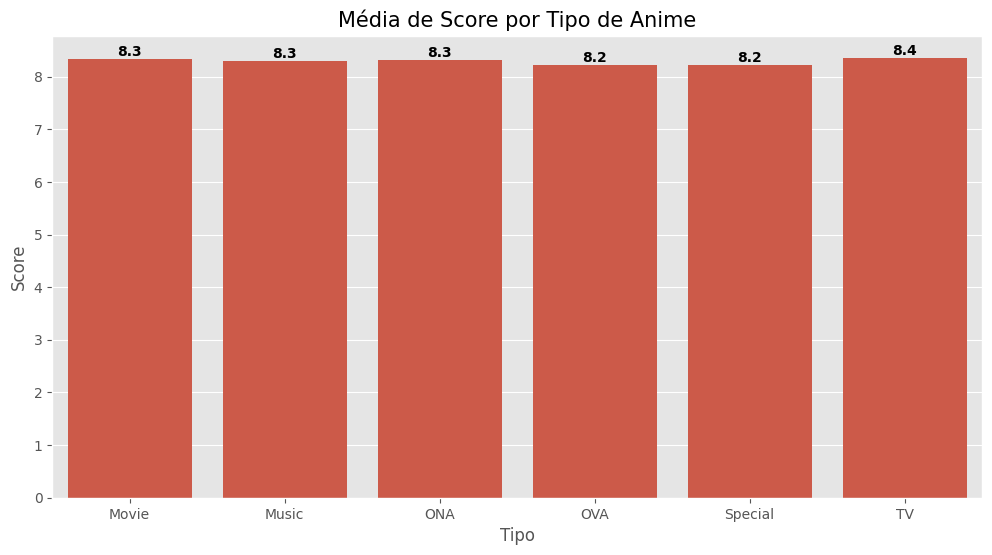

In [65]:
media_por_anime = df.groupby('animeType')['score'].mean()

plt.style.use('ggplot')
plt.figure(figsize=(12,6))
ax = sns.barplot(x=media_por_anime.index, y=media_por_anime.values)
for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', fontsize=10, fontweight='bold', color='black')

plt.title('Média de Score por Tipo de Anime', fontsize=15)
plt.xlabel('Tipo')
plt.ylabel('Score')
plt.show()

## 5- Quais são as fontes dos animes?

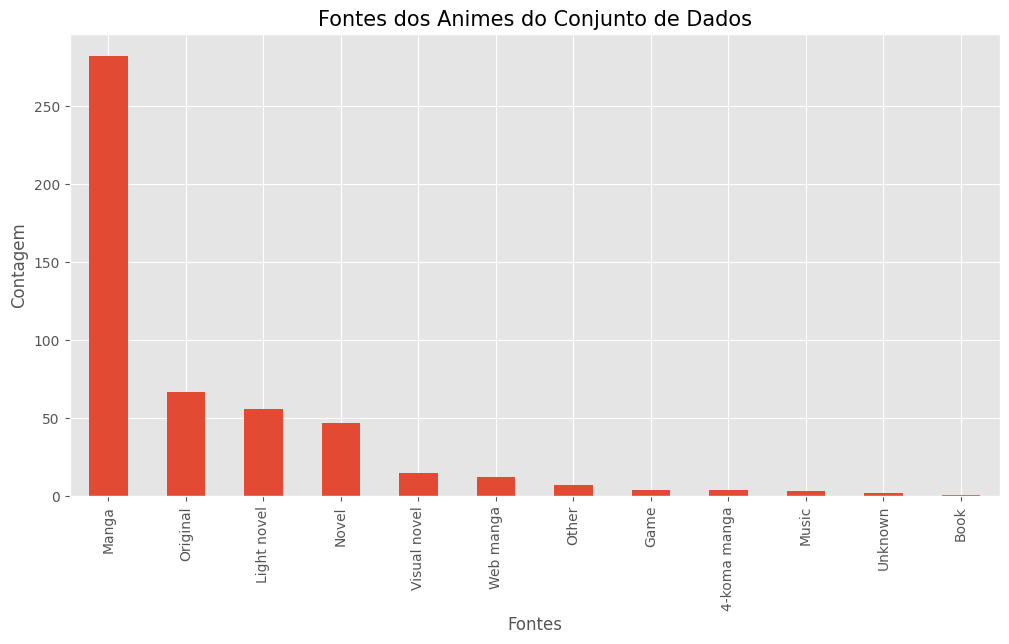

In [67]:
fontes = df['animeSource'].value_counts()

plt.figure(figsize=(12,6))
fontes.plot(kind='bar')
plt.title('Fontes dos Animes do Conjunto de Dados', fontsize=15)
plt.xlabel('Fontes')
plt.ylabel('Contagem')
plt.show()

## 6- Quantos animes estão disponíveis em português?

In [68]:
pt = df['Portuguese(BR)'].count()
print(f'Existem {pt} animes disponíveis em português.')

Existem 132 animes disponíveis em português.


## 7- Quantos animes têm co-produtores (Co-Producer)?

In [69]:
coprodutores = df['Co-Producer'].count()
print(f'Existem {coprodutores} animes com co-produtores.')

Existem 6 animes com co-produtores.


## 8- Há animes sem produtores?

In [70]:
sem_prod = df[df["producers"].str.contains("Nonefound")]
print(f'Existem {len(sem_prod)} animes sem produtores.')

Existem 64 animes sem produtores.


## 9- Quantos vezes cada produtor participou da produção de um anime?

In [71]:
produtores_unicos = set()

for linha in df['producers']:
    for produtor in linha.split(';'):
        produtores_unicos.add(produtor)

# Se quiser converter para lista no final
produtores_unicos = list(produtores_unicos)

In [72]:
dados = {}  

for linha in df['producers']:  
    produtores = linha.split(';')  
    
    for produtor in produtores:  
        if produtor in dados:  
            dados[produtor] += 1
        else:  
            dados[produtor] = 1

df_contagem_manual = pd.DataFrame(list(dados.items()), columns=['Produtor', 'Num_Vezes'])

print(df_contagem_manual.sort_values(by='Num_Vezes', ascending=False))

                 Produtor  Num_Vezes
0                 Aniplex        100
5                  Dentsu         70
63              Nonefound         64
64                addsome         64
25               Shueisha         61
..                    ...        ...
172  VoyagerEntertainment          1
170                   OLM          1
48       SoundTeamDonJuan          1
168                  GREE          1
280               Imagica          1

[281 rows x 2 columns]


## 10- Considerando o produtor que mais participou da produção de animes, qual a média de score, popularidade e membros?

In [73]:
top_produtor = df[df['producers'].str.contains('Aniplex')]
score = top_produtor['score'].mean().round(2)
popularidade = top_produtor['popularity'].mean().round(2)
membros = top_produtor['members'].mean().round(2)

print('Médias do Produtor que mais participou da produção de animes:')
print(f' - Score: {score}')
print(f' - Popularidade: {popularidade}')
print(f' - Membros: {membros}')

Médias do Produtor que mais participou da produção de animes:
 - Score: 8.46
 - Popularidade: 672.04
 - Membros: 575046.02
